# Machine Learning Assignment
                                                                                               Shane Healy, October 2019

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10



In [2]:
# Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

dfu = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df = dfu.sort_values('medv')

## Describe Statistics of Data set

In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Boston Housing Price DataSet - Background

<div>Nitrous oxide level is to be predicted</div>

Median Price of a home is to be predicted

The dataset contains a total of 506 cases.


14 attributes:
* CRIM - per capita crime rate by town  <i>HIGH</i>
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<i>HIGH</i>
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling <i>HIGH</i>
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres <i>HIGH</i>
* RAD - index of accessibility to radial highways 
* TAX - full-value property-tax rate per 10,000 dolla bills <i>HIGH</i>
* PTRATIO - pupil-teacher ratio by town 
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <i>HIGH</i>
* LSTAT - percentage lower status of the population <i>HIGH</i>
* MEDV - Median value of owner-occupied homes in $1000's <b><i>RESULT</i></br>




 Attribute | Why Flagged as High Impact Factor     
:------|:------
   CRIM  | People dont like crims
   RM  | Implies larger properties implying more invested wealth
   DIS  | Easy commuting / commerce, buses etc. 
   TAX  | What GOV estimates for value for property
   CHAS  | Seems flagged
   Bk  | Americans is divided, race factors in US wealth and social structure 
   LSTAT | lower status: less £   


 Attribute | Why Flagged as Low Impact Factor     
:------|:------ 
   ZN  | Unknown
   INDUS  | Unknown
   PTRATIO  | Important but possibly lower budgeted people residing: unknown
   NOX  | Important but possibly accetpted for city living
   AGE  | Unknown 
   RAD  | Commuting factors
   PTRATIO  | Important but possibly lower budgeted people residing: unknown




### Highest influencing factors in house price

For initial view of boston, will plot CRIM, RM, DIS, TAX, CHAS, Bk, LSTAT against MEDVa.

From initial review, to select a subset for plotting, the above are factors that would initially suggest that they "could" have an influence on the result, the median value of woner-occupied homes in tens of thousands of US dollars. 

## Visualise the median house price

In [4]:
a = df['medv']

In [5]:
a.mean(), a.min(), a.max(), a.std()

(22.532806324110673, 5.0, 50.0, 9.197104087379817)

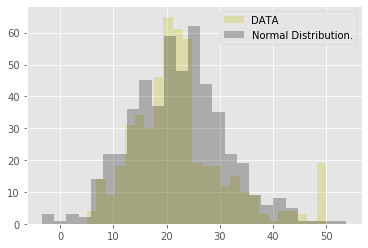

In [6]:
# Create histograms to visualise the distribution of house prices
plt.hist(a, bins=25, color='y', alpha=0.25, label="DATA")
plt.hist(np.random.normal(22.53, 9.2, 506), color='k', alpha=0.25, bins = 25, label = "Normal Distribution.")
plt.legend()
plt.show()

## Plots to Describe the Data Set 
Plot + linear regression?
Is median house prices a normal distribution and does that have uses??

In [7]:
MEDV = df['medv']

CRIM = df['crim']
RM = df['rm']
DIS = df['dis']
TAX = df['tax']
CHAS = df['chas']
BK = df['b']
LSTAT = df['lstat']
CHAS = df['chas']
ZN = df['zn']
INDUS  = df['indus']
PTRATIO  = df['ptratio']
NOX  = df['nox']
AGE  = df['age']
RAD  = df['rad']

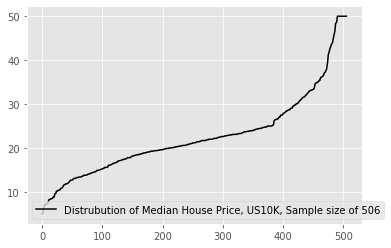

In [8]:
x = np.arange(0.0, 506, 1.0)

medv = np.sort(MEDV)

plt.plot(x, medv, 'k-', label="Distrubution of Median House Price, US10K, Sample size of 506")
plt.legend()


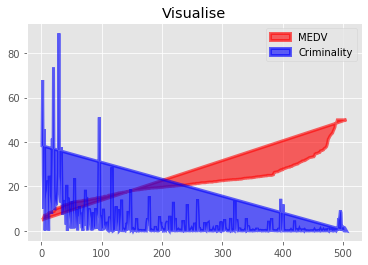

In [38]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, CRIM, c='b', alpha=0.6, lw=3.0, label="Criminality")

plt.title("Visualise")
plt.legend();

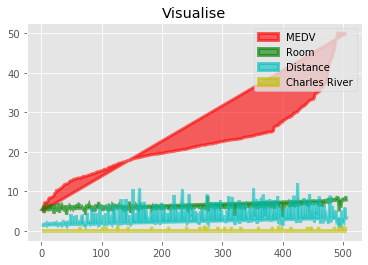

In [39]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, RM, c='g', alpha=0.6, lw=3.0, label ="Room")
plt.fill(x, DIS, c='c', alpha=0.6, lw=3.0, label ="Distance")
plt.fill(x, CHAS, c='y', alpha=0.6, lw=3.0, label ="Charles River")


plt.title("Visualise")
plt.legend();

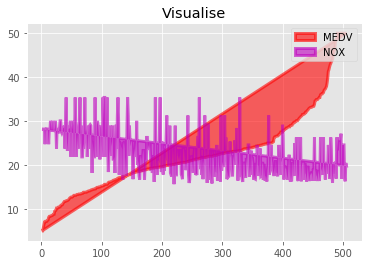

In [40]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

#Scaling NOX parameter to view against Median house price 
scaleNOX = NOX * (MEDV.mean()/NOX.mean())

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, scaleNOX, c='m', alpha=0.6, lw=3.0, label ="NOX")

plt.title("Visualise")
plt.legend();

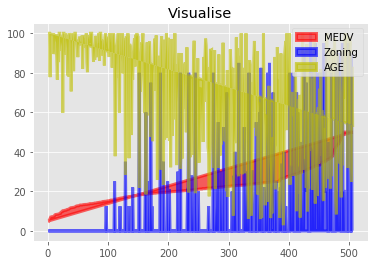

In [41]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, ZN, c='b', alpha=0.6, lw=3.0, label ="Zoning")
plt.fill(x, AGE, c='y', alpha=0.6, lw=3.0, label ="AGE")


plt.title("Visualise")
plt.legend();

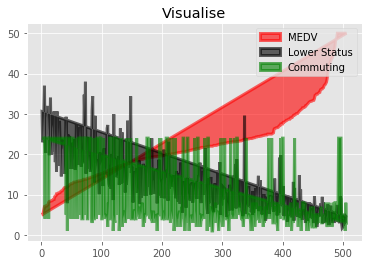

In [13]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, LSTAT, c='k', alpha=0.6, lw=3.0, label ="Lower Status")
plt.fill(x, RAD, c='g', alpha=0.6, lw=3.0, label ="Commuting")


plt.title("Visualise")
plt.legend();

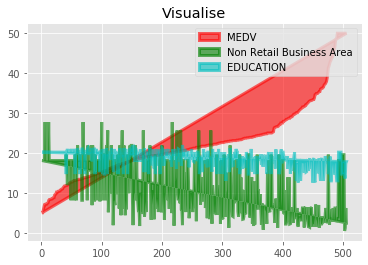

In [14]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, INDUS, c='g', alpha=0.6, lw=3.0, label ="Non Retail Business Area")
plt.fill(x, PTRATIO, c='c', alpha=0.6, lw=3.0, label ="EDUCATION")



plt.title("Visualise")
plt.legend();

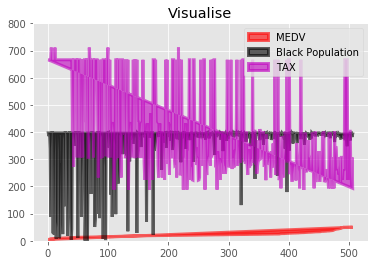

In [15]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, BK, c='k', alpha=0.6, lw=3.0, label ="Black Population")
plt.fill(x, TAX, c='m', alpha=0.6, lw=3.0, label ="TAX")


x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,800))


plt.title("Visualise")
plt.legend();

In [16]:
df.tail(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0


In [17]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.35180,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.1,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0


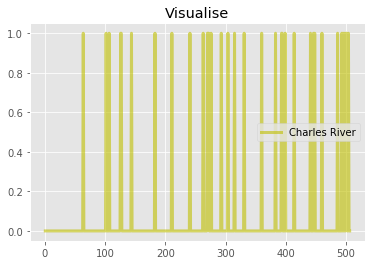

In [18]:
x = np.arange(1, 507, 1.0)

plt.plot(x, CHAS, c='y', alpha=0.6, lw=3.0, label ="Charles River")

plt.title("Visualise")
plt.legend();

In [19]:
idx = df.chas.eq(0).idxmax()
df['CHAS'] = False
X = df.loc[idx:, 'CHAS'] = True

In [20]:
# Charles River(dummy variable) is True or False
# Generate id of what where True instances are in dataframe

i=0
charlesPrice = []
charlesIndex = []

for chas in CHAS:
    if chas>0:
        charlesPrice.append(MEDV[i])
        charlesIndex.append(i)
    i+=1
    

In [21]:
dfc = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

### Sorting DF by Median House Price

In [22]:
data_url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

read = pd.read_csv(data_url)


In [23]:
# New dataframe to sort the data by Median House Price starting a lowest value.
df_sorted = read.sort_values('medv')

In [24]:
df_sorted

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0


## Charles River Impact

### Analysis with Inferential Statistics
Use inferential statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t.

In [25]:
CHAS.sum()
# House prices where CHAS is true?
#get index from CHAS where true + find house price at that index


35

There are 35 data points where CHAS variable is true.

In [26]:
#Selecting rows where chas variable is true
dfCHAS = df.loc[df['chas'] == 1]

In [27]:
a = dfCHAS['medv']

In [28]:
print("The median house price bordering Charles river is",a.median())

The median house price bordering Charles river is 23.3


In [29]:
dfnCHAS = df.loc[df['chas'] == 0]

In [30]:
b = dfnCHAS['medv']

In [31]:
print("The median house price bordering not Charles river is",b.median())

The median house price bordering not Charles river is 20.9


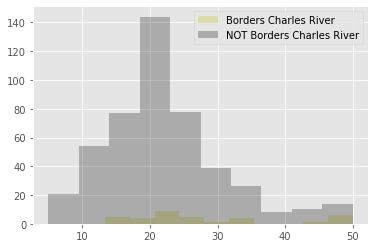

In [32]:
plt.hist(a, color='y', alpha=0.25, label="Borders Charles River")
plt.hist(b, color='k', alpha=0.25, label="NOT Borders Charles River")
plt.legend()
plt.show()

## T-TEST

Using Welch's t-test.
For unequal variances t-test, it is a two sample test used to test the hypotheses that two populations have equal means. Suited where two samples have unequal variances and/or unequal sample sizes. 



In [33]:
stats.ttest_ind(df['medv'][df['chas']==1], df['medv'][df['chas']==0], equal_var=0)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

### IS MEDV normally distributed, are T-tests applicable
Visually appears normally distributed.
Checked with QQ plot from statsmodels, fit to the expected diagonal pattern for normal distribution is not perfect and accentuted at the upper and lower bounds.

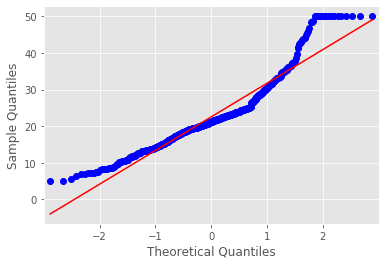

In [34]:
# IS MEDV normally distributed, are T-tests applicable
from statsmodels.graphics.gofplots import qqplot
qqplot(MEDV, line='s')
plt.show()

In [35]:
#check
stat, p = stats.normaltest(MEDV)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=90.975, p=0.000
Sample does not look Gaussian (reject H0)


### Discussion

## Model
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System

TensorFlow 2 and Keras installed on machine.
TensorFlow CPU environment is required running to run keras???

In [36]:
import keras
import tensorflow as tf

Using TensorFlow backend.


## References

1. Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv 
2. Keras, https://keras.io/#getting-started-30-seconds-to-keras
3. Data Set CSO, https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
4. Welch's t-test, https://en.wikipedia.org/wiki/Welch%27s_t-test

## Assignment:
https://github.com/ianmcloughlin/project-2019-machstat/raw/master/project.pdf